In [5]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

torch.__version__

'1.6.0'

## Derivatives and tensors

In [6]:
t = torch.ones(2,5)
print(t.requires_grad)

#x is a tensor initialised with value 2
#requires_grad as True, it starts to track all operations on it.
x = torch.tensor(25, dtype=torch.float64, requires_grad=True)
print(x)
#y = f(x)
y = x**2
print(y)

False
tensor(25., dtype=torch.float64, requires_grad=True)
tensor(625., dtype=torch.float64, grad_fn=<PowBackward0>)


#### Calculating derivative using backward()

In [7]:
print("x ::", x)
print("x data :: ", x.data)
print("x  gradient :: ", x.grad)
print("x gradient function :: ", x.grad_fn)

print("y ::", y)
print("y data :: ", y.data)
print("y  gradient :: ", y.grad)
print("y gradient function :: ", y.grad_fn)

#finish all computation then can call .backward() and have all the gradients computed automatically.
y.backward()

x :: tensor(25., dtype=torch.float64, requires_grad=True)
x data ::  tensor(25., dtype=torch.float64)
x  gradient ::  None
x gradient function ::  None
y :: tensor(625., dtype=torch.float64, grad_fn=<PowBackward0>)
y data ::  tensor(625., dtype=torch.float64)
y  gradient ::  None
y gradient function ::  <PowBackward0 object at 0x7ff0d5e20cc0>


y = x ** 2 <br>
dy/dx = 2 * x <br>
dy/dx at x=25 :: 2 * 25 :: 50 => x.grad <br>
The gradient for this tensor will be accumulated into .grad attribute. <br>
 .grad_fn attribute that references a Function that has created the Tensor

In [8]:
print("x ::", x)
print("x data :: ", x.data)
print("x  gradient :: ", x.grad)
print("x gradient function :: ", x.grad_fn)

print("y ::", y)
print("y data :: ", y.data)
print("y  gradient :: ", y.grad)
print("y gradient function :: ", y.grad_fn)

x :: tensor(25., dtype=torch.float64, requires_grad=True)
x data ::  tensor(25., dtype=torch.float64)
x  gradient ::  tensor(50., dtype=torch.float64)
x gradient function ::  None
y :: tensor(625., dtype=torch.float64, grad_fn=<PowBackward0>)
y data ::  tensor(625., dtype=torch.float64)
y  gradient ::  None
y gradient function ::  <PowBackward0 object at 0x7ff0d5e20b38>


### Chain Rule: dz/dx = dz/dy * dy/dx

In [10]:
x = torch.tensor(2, dtype=torch.float64, requires_grad=True)
y = x ** 2
z = (y ** 3) * 3

z.backward()

print("x ::", x)
print("x data :: ", x.data)
print("x  gradient :: ", x.grad)
print("x gradient function :: ", x.grad_fn)

print("y ::", y)
print("y data :: ", y.data)
print("y  gradient :: ", y.grad)
print("y gradient function :: ", y.grad_fn)

print("z ::", z)
print("z data :: ", z.data)
print("z  gradient :: ", z.grad)
print("z gradient function :: ", z.grad_fn)

x :: tensor(2., dtype=torch.float64, requires_grad=True)
x data ::  tensor(2., dtype=torch.float64)
x  gradient ::  tensor(576., dtype=torch.float64)
x gradient function ::  None
y :: tensor(4., dtype=torch.float64, grad_fn=<PowBackward0>)
y data ::  tensor(4., dtype=torch.float64)
y  gradient ::  None
y gradient function ::  <PowBackward0 object at 0x7ff0d5e3a7b8>
z :: tensor(192., dtype=torch.float64, grad_fn=<MulBackward0>)
z data ::  tensor(192., dtype=torch.float64)
z  gradient ::  None
z gradient function ::  <MulBackward0 object at 0x7ff0d5e3a7b8>


### Partial Derivatives

In [12]:
u = torch.tensor(2, dtype=torch.float64)
u.requires_grad_(True)
print(u)

v = torch.tensor(3, dtype=torch.float64, requires_grad=True)
print(v)

# y = f(u, v)
y = u*v + u**2
print(y)

y.backward()

tensor(2., dtype=torch.float64, requires_grad=True)
tensor(3., dtype=torch.float64, requires_grad=True)
tensor(10., dtype=torch.float64, grad_fn=<AddBackward0>)


dy/du = df(u, v)/du = v + 2u = 3 + 2 * 2 = 7 => u.grad

In [13]:
print("u ::", u)
print("u data :: ", u.data)
print("u  gradient :: ", u.grad)
print("u gradient function :: ", u.grad_fn)

u :: tensor(2., dtype=torch.float64, requires_grad=True)
u data ::  tensor(2., dtype=torch.float64)
u  gradient ::  tensor(7., dtype=torch.float64)
u gradient function ::  None


dy/dv = df(u, v)/dv = u = 2 => v.grad

In [14]:
print("v ::", v)
print("v data :: ", v.data)
print("v  gradient :: ", v.grad)
print("v gradient function :: ", v.grad_fn)

v :: tensor(3., dtype=torch.float64, requires_grad=True)
v data ::  tensor(3., dtype=torch.float64)
v  gradient ::  tensor(2., dtype=torch.float64)
v gradient function ::  None


In [15]:
print("y ::", y)
print("y data :: ", y.data)
print("y  gradient :: ", y.grad)
print("y gradient function :: ", y.grad_fn)

y :: tensor(10., dtype=torch.float64, grad_fn=<AddBackward0>)
y data ::  tensor(10., dtype=torch.float64)
y  gradient ::  None
y gradient function ::  <AddBackward0 object at 0x7ff0d5e206a0>


#### Sometimes some parameters need not to be updated: Use with torch.no_grad()

In [17]:
print(t)

t.requires_grad_(True)
print(t)
with torch.no_grad():
    print((t**2).requires_grad)

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])
tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]], requires_grad=True)
False


In [18]:
#To stop a tensor from tracking history, you can call .detach()
#particularly helpful when evaluating a model 
#because the model may have trainable parameters with requires_grad=True, 
#but for which we don’t need the gradients.
print(t)
t.detach_()
print(t)

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]], requires_grad=True)
tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])


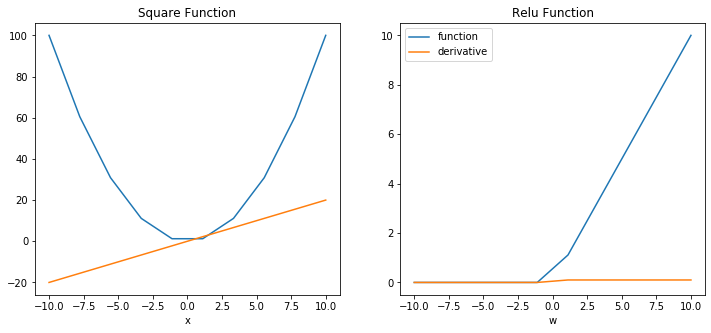

In [20]:
x = torch.linspace(-10, 10, 10, requires_grad = True)
w = torch.linspace(-10, 10, 10, requires_grad = True)

Y = x ** 2
Z = torch.relu(w)

y = torch.sum(Y)
z = torch.mean(Z)

#torch.autograd cannot compute full Jacobian directly
#input to backward must be scalar.
#if it is not scalar, need to pass a vector for vector jacobian product.
y.backward()
z.backward()

plt.figure(figsize=(12, 5))

ax0 = plt.subplot(121)
ax0.plot(x.detach().numpy(), Y.detach().numpy(), label = 'function')
ax0.plot(x.detach().numpy(), x.grad.detach().numpy(), label = 'derivative')
ax0.set_xlabel('x')
ax0.set_title('Square Function')

ax1 = plt.subplot(122)
ax1.plot(w.detach().numpy(), Z.detach().numpy(), label = 'function')
ax1.plot(w.detach().numpy(), w.grad.detach().numpy(), label = 'derivative')
ax1.set_xlabel('w')
ax1.set_title('Relu Function')

plt.legend()
plt.show()

Check this [link](https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html) for detailed explaination.